In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore', category=FutureWarning)
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")
%matplotlib inline

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
data_dict = pd.read_csv('data/data_dictionary.csv')

In [4]:
# Lets replace empty values with NaN
train.replace(to_replace='', value=np.nan, inplace=True)
test.replace(to_replace='', value=np.nan, inplace=True)

In [5]:
display(train.head())
print(f"Train shape: {train.shape}")

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,7.0,33.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,9.0,37.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Train shape: (3960, 82)


## Data analysis & cleaning

Before diving into the heart of the analysis, a thorough data cleaning process is essential. This involves identifying and rectifying inconsistencies, missing values, and outliers within the dataset. By ensuring data accuracy and completeness, we lay a solid foundation for reliable and insightful analysis.

In [6]:
# Let's create groups of data by the way they were gathered
groups = data_dict.groupby('Instrument')['Field'].apply(list).to_dict()

Let's understand the data we are working with.

### Let's display the string values

In [7]:
str_value_fields = data_dict[data_dict['Type'] == 'str']
display(str_value_fields)

,Instrument,Field,Description,Type,Values,Value Labels
0,Identifier,id,Participant's ID,str,NaN,NaN
1,Demographics,Basic_Demos-Enroll_Season,Season of enrollment,str,"Spring, Summer, Fall, Winter",NaN
4,Children's Global Assessment Scale,CGAS-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
6,Physical Measures,Physical-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
14,FitnessGram Vitals and Treadmill,Fitness_Endurance-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
18,FitnessGram Child,FGC-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
33,Bio-electric Impedance Analysis,BIA-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
50,Physical Activity Questionnaire (Adolescents),PAQ_A-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
52,Physical Activity Questionnaire (Children),PAQ_C-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN
54,Parent-Child Internet Addiction Test,PCIAT-Season,Season of participation,str,"Spring, Summer, Fall, Winter",NaN


We can see that, excluding the Participant ID, all the values are the four seasons: Spring, Summer, Fall, Winter). This can be hard for the machine learning algorithms to understand and would thus require __one-hot encoding__. We should also evaluate if the season matters for every instrument so that we would not have redundant information in out data.

### Let's display the integer values

In [8]:
int_value_fields = data_dict[data_dict['Type'] == 'int']
display(int_value_fields)

,Instrument,Field,Description,Type,Values,Value Labels
5,Children's Global Assessment Scale,CGAS-CGAS_Score,Children's Global Assessment Scale Score,int,NaN,NaN
10,Physical Measures,Physical-Waist_Circumference,Waist circumference (in),int,NaN,NaN
11,Physical Measures,Physical-Diastolic_BP,Diastolic BP (mmHg),int,NaN,NaN
12,Physical Measures,Physical-HeartRate,Heart rate (beats/min),int,NaN,NaN
13,Physical Measures,Physical-Systolic_BP,Systolic BP (mmHg),int,NaN,NaN
15,FitnessGram Vitals and Treadmill,Fitness_Endurance-Max_Stage,Maximum stage reached,int,NaN,NaN
16,FitnessGram Vitals and Treadmill,Fitness_Endurance-Time_Mins,Exact time completed: Minutes,int,NaN,NaN
17,FitnessGram Vitals and Treadmill,Fitness_Endurance-Time_Sec,Exact time completed: Seconds,int,NaN,NaN
19,FitnessGram Child,FGC-FGC_CU,Curl up total,int,NaN,NaN
25,FitnessGram Child,FGC-FGC_PU,Push-up total,int,NaN,NaN


Integer values, unfortunately, are quite susceptible to outliers and incorrect entries. Given their inherent vulnerability, let's delve deeper into the data to uncover any potential anomalies.

In [9]:
# Counts the number of zero values in a specific column of a DataFrame
def count_zero_values(df, column_name):
    return df[column_name].eq(0).sum()

# Counts the number of nan values in a specific column of a DataFrame
def count_nan_values(df, column_name):
    return df[column_name].eq('nan').sum()

# Checks if any values in a specified column are outside the given bounds
def is_out_of_bounds(df, column_name, lower_bound, upper_bound):
    return (df[column_name] < lower_bound) | (df[column_name] > upper_bound)

# Creates a histogram to visualize the range of integer values in a DataFrame column
def visualize_int_range(df, column_name):
    # Extract the integer column
    int_column = df[column_name]
    
    # Create the histogram
    plt.hist(int_column)
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {column_name} values")
    plt.show()

def plot_correlation(df, col1, col2, title="Correlation between", figsize=(8, 6)):
  # Calculate correlation coefficient
  correlation = df[col1].corr(df[col2])

  # Create scatter plot
  plt.figure(figsize=figsize)
  plt.scatter(df[col1], df[col2])

  # Add labels and title
  plt.xlabel(col1)
  plt.ylabel(col2)
  plt.title(f"{title} {col1} and {col2} (correlation: {correlation:.2f})")

  # Display plot
  plt.grid(True)
  plt.show()

In [10]:
for field in int_value_fields['Field']:
    print(f"{field}: {count_zero_values(train, field)}")

CGAS-CGAS_Score: 0
Physical-Waist_Circumference: 0
Physical-Diastolic_BP: 1
Physical-HeartRate: 0
Physical-Systolic_BP: 1
Fitness_Endurance-Max_Stage: 1
Fitness_Endurance-Time_Mins: 12
Fitness_Endurance-Time_Sec: 57
FGC-FGC_CU: 431
FGC-FGC_PU: 810
FGC-FGC_TL: 12
PCIAT-PCIAT_Total: 313
SDS-SDS_Total_Raw: 0
SDS-SDS_Total_T: 0


#### We can see that there are multiple fields with zero values:
- __Blood Pressure:__ Zero values for blood pressure are highly unlikely for living individuals and likely indicate data entry errors. These should be corrected or removed.
- __Fitness Endurance:__ Zero values in fitness endurance tests might indicate incomplete data or specific test protocols. Further investigation is needed to determine the cause of these zeros.
- __FitnessGram Child:__ Zero values for curl-ups, push-ups, and trunk lifts can be valid results, indicating that the child was unable to perform the exercise.
- __PCIAT:__ Zero values in the PCIAT-PCIAT_Total field might indicate that the test was not completed or that all questions were answered with "Does Not Apply." If the latter is the case, these values might need further consideration.57

#### Let's remove the zero blood-pressure values

In [11]:
train['Physical-Diastolic_BP'] = train['Physical-Diastolic_BP'].replace(0, np.nan)
train['Physical-Systolic_BP'] = train['Physical-Systolic_BP'].replace(0, np.nan)

#### Now let's dive into the Fitness Endurance fields.

In [12]:
groups.get('FitnessGram Vitals and Treadmill')

['Fitness_Endurance-Season',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec']

The test seems to measure the time and stage a subject could endure. We can see that the time is recorded with two separate values for minutes and seconds. Let's take a look at the values.

In [13]:
# Filter the data for zero values
zero_time_rows = train[(train['Fitness_Endurance-Time_Mins'] == 0) & (train['Fitness_Endurance-Time_Sec'] == 0)]

print("Count of tests subjects with the time of 0 minutes and 0 seconds:", len(zero_time_rows))

Count of tests subjects with the time of 0 minutes and 0 seconds: 0


Seems like every subject endured longer then 0 seconds. Let's dig deeper. 

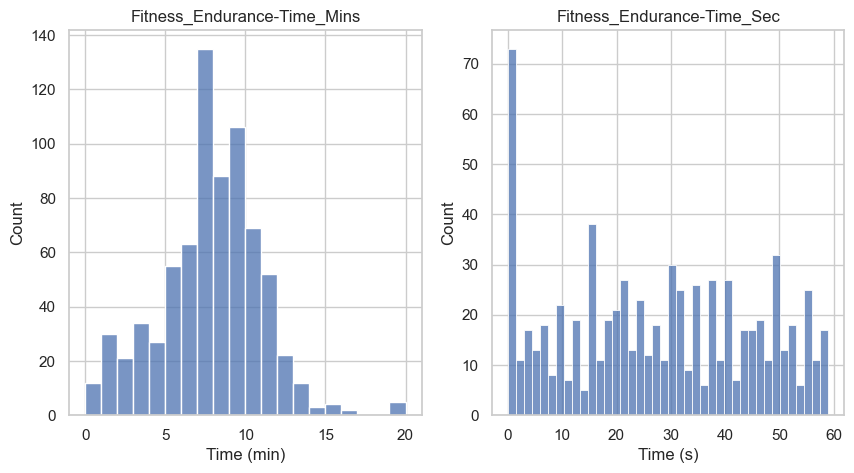

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Fitness Endurance Time (Minutes)
sns.histplot(train['Fitness_Endurance-Time_Mins'], bins=20, ax=axes[0])
axes[0].set_title('Fitness_Endurance-Time_Mins')
axes[0].set_xlabel('Time (min)')

# Fitness Endurance Time (Seconds)
sns.histplot(train['Fitness_Endurance-Time_Sec'], bins=40, ax=axes[1])
axes[1].set_title('Fitness_Endurance-Time_Sec')
axes[1].set_xlabel('Time (s)')

plt.show()

The time values seem normal for both minutes and seconds. The only suspicious value seems to be that there are a lot of cases where the time is an exact minute. This might indicate some inconsistency with measurements, but is rather insignificant and could be ignored.

In [15]:
# Let's define the columns we want to display
cols = [
    'Fitness_Endurance-Max_Stage',
    'Fitness_Endurance-Time_Mins',
    'Fitness_Endurance-Time_Sec'
]

# Let's check is there are any non-numeric time values where stage is not missing
train[
    (train['Fitness_Endurance-Max_Stage'].notna()) & 
    (train['Fitness_Endurance-Time_Mins'].isna() | train['Fitness_Endurance-Time_Sec'].isna())
][cols]

,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Mins,Fitness_Endurance-Time_Sec
420,4.0,6.0,NaN
1470,26.0,NaN,NaN
2907,1.0,NaN,26.0
3666,2.0,NaN,NaN


We can see that the there have been suspicious entries for time values. These values should be removed.

In [16]:
train.loc[
    (train['Fitness_Endurance-Max_Stage'].notna()) & 
    (train['Fitness_Endurance-Time_Mins'].isna() | train['Fitness_Endurance-Time_Sec'].isna()), 
    cols
] = np.nan

We can now concatenate the minutes and seconds into seconds for ease of use and simplicity.

In [17]:
# Combine minutes and seconds into total seconds
train['Fitness_Endurance-Time_Sec'] = (
    train['Fitness_Endurance-Time_Mins'] * 60 + train['Fitness_Endurance-Time_Sec']
)

# Drop the minutes and seconds columns
train.drop(columns=['Fitness_Endurance-Time_Mins'], inplace=True)

In [18]:
train.head()

,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,Fitness_Endurance-Season,Fitness_Endurance-Max_Stage,Fitness_Endurance-Time_Sec,FGC-Season,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_GSND,FGC-FGC_GSND_Zone,FGC-FGC_GSD,FGC-FGC_GSD_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-Season,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PAQ_A-Season,PAQ_A-PAQ_A_Total,PAQ_C-Season,PAQ_C-PAQ_C_Total,PCIAT-Season,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,50.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fall,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,7.0,0.0,6.0,0.0,6.0,1.0,Fall,2.0,2.66855,16.8792,932.498,1492.00,8.25598,41.5862,13.8177,3.06143,9.21377,1.0,24.4349,8.89536,38.9177,19.5413,32.6909,NaN,NaN,NaN,NaN,Fall,5.0,4.0,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,46.0,22.0,75.0,70.0,122.0,NaN,NaN,NaN,Fall,3.0,0.0,NaN,NaN,NaN,NaN,5.0,0.0,11.0,1.0,11.0,1.0,3.0,0.0,Winter,2.0,2.57949,14.0371,936.656,1498.65,6.01993,42.0291,12.8254,1.21172,3.97085,1.0,21.0352,14.97400,39.4497,15.4107,27.0552,NaN,NaN,Fall,2.340,Fall,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,75.6,NaN,65.0,94.0,117.0,Fall,5.0,453.0,Fall,20.0,1.0,10.2,1.0,14.7,2.0,7.0,1.0,10.0,1.0,10.0,1.0,5.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,2.170,Fall,5.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,81.6,NaN,60.0,97.0,117.0,Summer,6.0,577.0,Summer,18.0,1.0,NaN,NaN,NaN,NaN,5.0,0.0,7.0,0.0,7.0,0.0,7.0,1.0,Summer,3.0,3.84191,18.2943,1131.430,1923.44,15.59250,62.7757,14.0740,4.22033,18.82430,2.0,30.4041,16.77900,58.9338,26.4798,45.9966,NaN,NaN,Winter,2.451,Summer,4.0,2.0,4.0,0.0,5.0,1.0,0.0,3.0,2.0,2.0,3.0,0.0,3.0,0.0,0.0,3.0,4.0,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,1.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that the fitness values are gathered by a test and the season is also recorded. Let's see if the season plays any role in the data.

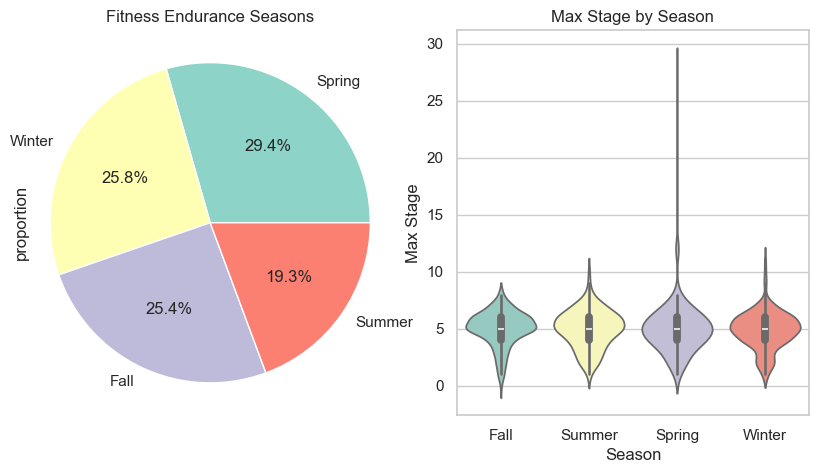

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Fitness Endurance Season
train['Fitness_Endurance-Season'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=plt.cm.Set3.colors, ax=axes[0]
)
axes[0].set_title('Fitness Endurance Seasons')
axes[0].axis('equal')

# Violin plot for Max Stage by Season
sns.violinplot(
    x='Fitness_Endurance-Season',
    y='Fitness_Endurance-Max_Stage',
    data=train,
    palette="Set3",
    ax=axes[1]
)
axes[1].set_title('Max Stage by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Max Stage')

plt.show()

The only substantial difference seems to be the max stage in spring. Let's take a look at it.

In [20]:
high_max_stage_in_spring = train[(train['Fitness_Endurance-Season'] == 'Spring') & (train['Fitness_Endurance-Max_Stage'] > 15)]

Since there is only one person who reached such a high stage then it is not enough to say that the results vary between seasons. Additionally the max stage value seems to be an outlier when considering the time it took to reach it. Let's remove it.

In [21]:
high_max_stage_in_spring['Fitness_Endurance-Time_Sec'] = np.nan
high_max_stage_in_spring['Fitness_Endurance-Max_Stage'] = np.nan

train.loc[high_max_stage_in_spring.index] = high_max_stage_in_spring

C:\Users\uku1\AppData\Local\Temp\ipykernel_6960\1939171394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_max_stage_in_spring['Fitness_Endurance-Time_Sec'] = np.nan
C:\Users\uku1\AppData\Local\Temp\ipykernel_6960\1939171394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_max_stage_in_spring['Fitness_Endurance-Max_Stage'] = np.nan


The last thing is to check if the demographics vary between seasons.

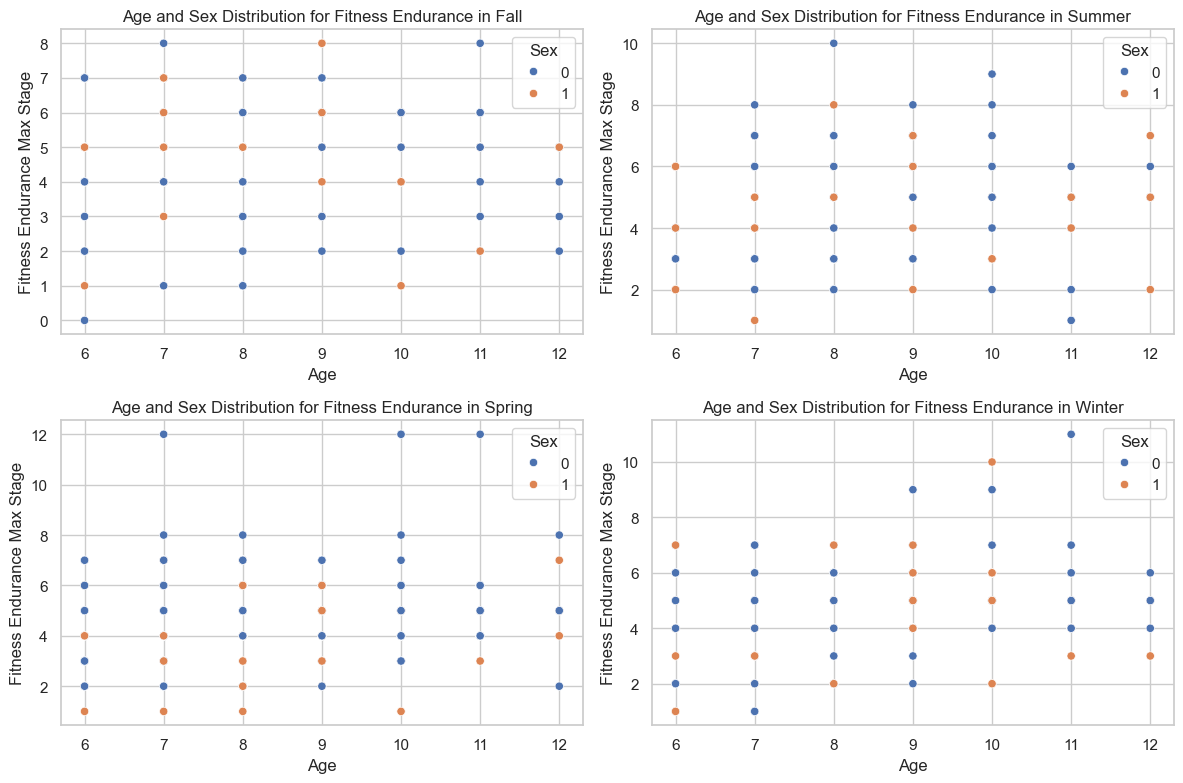

In [22]:
seasons = ['Fall', 'Summer', 'Spring', 'Winter']  # List of seasons

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Loop through each season and create a scatter plot in the corresponding subplot
for i, season in enumerate(seasons):
    row = i // 2  # Integer division for row index (0 or 1)
    col = i % 2  # Modulus for column index (0 or 1)
    
    filtered_data = train[train['Fitness_Endurance-Season'] == season]

    # Create the scatter plot in the current subplot
    sns.scatterplot(
        x='Basic_Demos-Age',
        y='Fitness_Endurance-Max_Stage',
        hue='Basic_Demos-Sex',
        data=filtered_data,
        ax=axes[row, col]
    )
    
    # Set title, labels, and legend for each subplot
    axes[row, col].set_title(f'Age and Sex Distribution for Fitness Endurance in {season}')
    axes[row, col].set_xlabel('Age')
    axes[row, col].set_ylabel('Fitness Endurance Max Stage')
    axes[row, col].legend(title='Sex')

plt.tight_layout()

plt.show()

Again no substantial differences. Now we can conclude that the season does not make a big difference in this test.

### Let's display the float values

In [23]:
float_value_fields = data_dict[data_dict['Type'] == 'float']
display(float_value_fields)

,Instrument,Field,Description,Type,Values,Value Labels
2,Demographics,Basic_Demos-Age,Age of participant,float,NaN,NaN
7,Physical Measures,Physical-BMI,Body Mass Index (kg/m^2),float,NaN,NaN
8,Physical Measures,Physical-Height,Height (in),float,NaN,NaN
9,Physical Measures,Physical-Weight,Weight (lbs),float,NaN,NaN
21,FitnessGram Child,FGC-FGC_GSND,Grip Strength total (non-dominant),float,NaN,NaN
23,FitnessGram Child,FGC-FGC_GSD,Grip Strength total (dominant),float,NaN,NaN
27,FitnessGram Child,FGC-FGC_SRL,Sit & Reach total (left side),float,NaN,NaN
29,FitnessGram Child,FGC-FGC_SRR,Sit & Reach total (right side),float,NaN,NaN
35,Bio-electric Impedance Analysis,BIA-BIA_BMC,Bone Mineral Content,float,NaN,NaN
36,Bio-electric Impedance Analysis,BIA-BIA_BMI,Body Mass Index,float,NaN,NaN


Let's analyze the float values.

In [24]:
for field in float_value_fields['Field']:
    print(f"{field}: {count_zero_values(train, field)}")

Basic_Demos-Age: 0
Physical-BMI: 7
Physical-Height: 0
Physical-Weight: 61
FGC-FGC_GSND: 4
FGC-FGC_GSD: 3
FGC-FGC_SRL: 105
FGC-FGC_SRR: 98
BIA-BIA_BMC: 0
BIA-BIA_BMI: 0
BIA-BIA_BMR: 0
BIA-BIA_DEE: 0
BIA-BIA_ECW: 0
BIA-BIA_FFM: 0
BIA-BIA_FFMI: 0
BIA-BIA_FMI: 0
BIA-BIA_Fat: 0
BIA-BIA_ICW: 0
BIA-BIA_LDM: 0
BIA-BIA_LST: 0
BIA-BIA_SMM: 0
BIA-BIA_TBW: 0
PAQ_A-PAQ_A_Total: 0
PAQ_C-PAQ_C_Total: 0


Right away we can see that there seem to be incorrect values. For example BMI and weight can not be of value 0. Additionaly grip strength total values and sit & reach values are suspicious.

Firstly let's remove the BMI and weight zero values.

In [25]:
train['Physical-BMI'] = train['Physical-BMI'].replace(0, np.nan)
train['Physical-Weight'] = train['Physical-Weight'].replace(0, np.nan)

Before we move on to the FGC, BIA and PAQ values let's analyse the age and physical values some more.

In [26]:
print(train['Basic_Demos-Age'].describe())
print(train['Physical-BMI'].describe())
print(train['Physical-Weight'].describe())
print(train['Physical-Height'].describe())

count    3960.000000
mean       10.433586
std         3.574648
min         5.000000
25%         8.000000
50%        10.000000
75%        13.000000
max        22.000000
Name: Basic_Demos-Age, dtype: float64
count    3015.000000
mean       19.376812
std         5.034191
min         8.522436
25%        15.890526
50%        17.950925
75%        21.588631
max        59.132048
Name: Physical-BMI, dtype: float64
count    3015.000000
mean       90.840060
std        43.161374
min        31.800000
25%        58.200000
50%        77.800000
75%       114.300000
max       315.000000
Name: Physical-Weight, dtype: float64
count    3027.000000
mean       55.946713
std         7.473764
min        33.000000
25%        50.000000
50%        55.000000
75%        62.000000
max        78.500000
Name: Physical-Height, dtype: float64


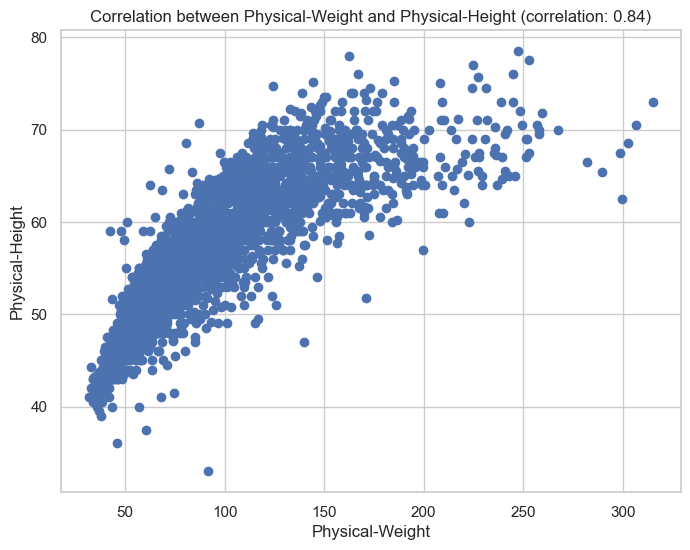

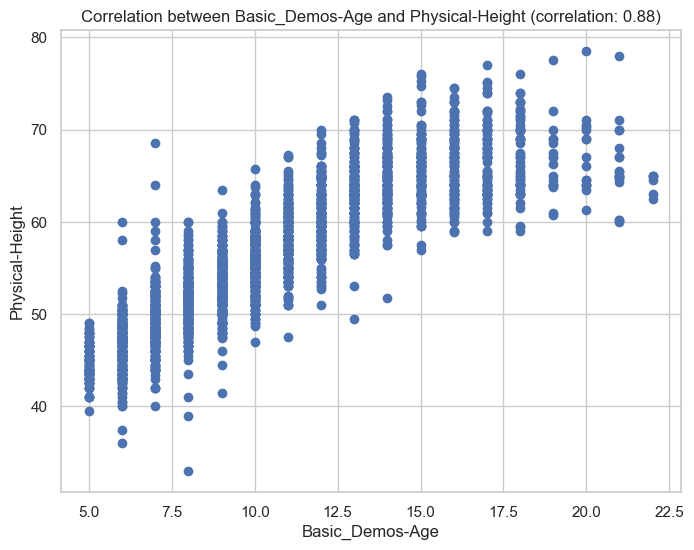

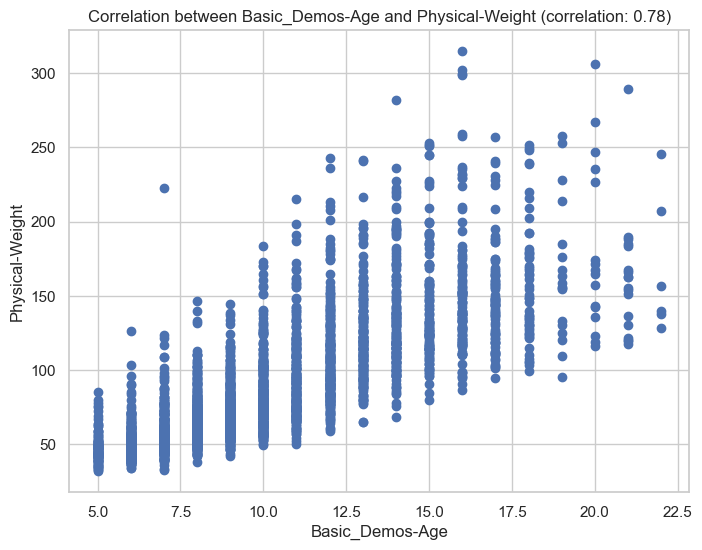

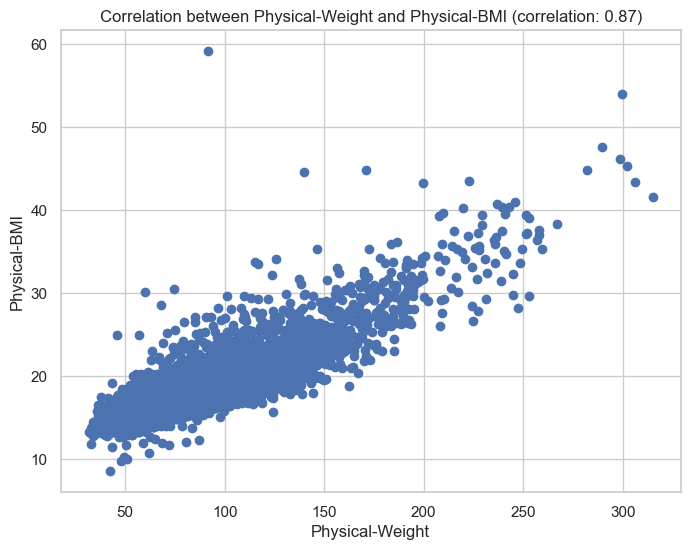

In [27]:
plot_correlation(train, 'Physical-Weight', 'Physical-Height')
plot_correlation(train, 'Basic_Demos-Age', 'Physical-Height')
plot_correlation(train, 'Basic_Demos-Age', 'Physical-Weight')
plot_correlation(train, 'Physical-Weight', 'Physical-BMI')

The physical attributes seems to be okay. Although we have some values that seem to be outliers, then we can't claim that these are errors and not for example a physical disorder that has caused the suspicious values. So let's take a look at the FGC data.

In [28]:
def clean_grip_strength(train, column, age_column, max_value, age_threshold):
    condition = (
        (train[column] == 0) |
        ((train[column] > max_value) & (train[age_column] < age_threshold))
    )
    train[column] = np.where(condition, np.nan, train[column])
    return train

train = clean_grip_strength(train, 'FGC-FGC_GSND', 'Basic_Demos-Age', max_value=70, age_threshold=18)
train = clean_grip_strength(train, 'FGC-FGC_GSD', 'Basic_Demos-Age', max_value=70, age_threshold=18)

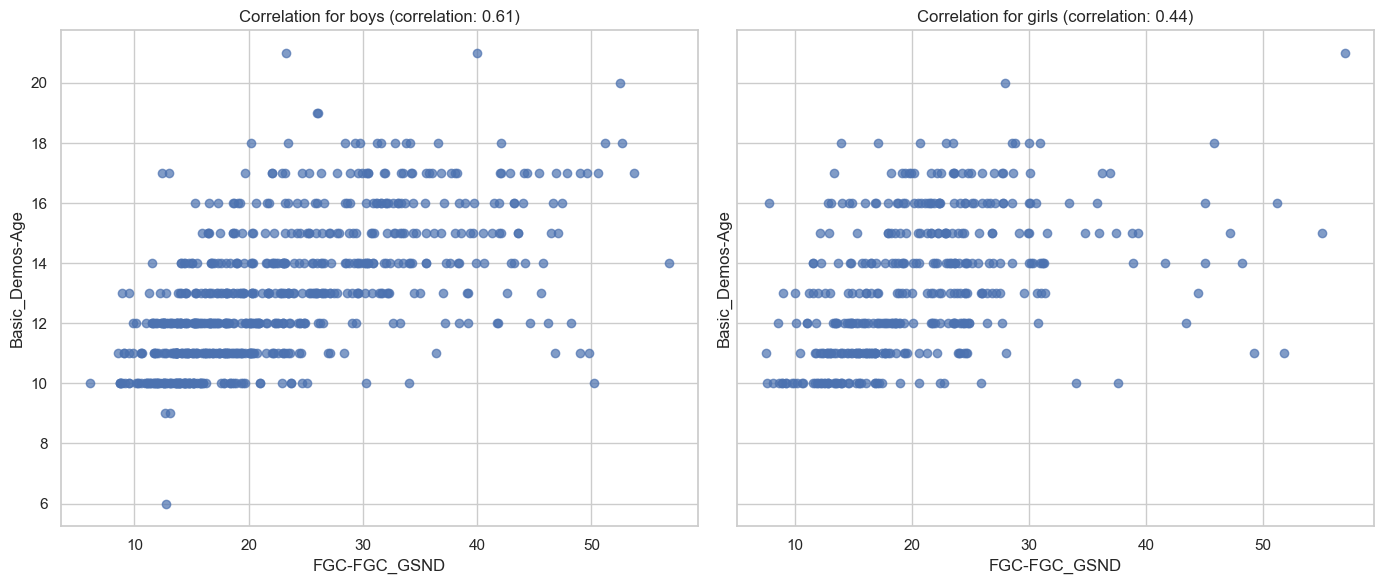

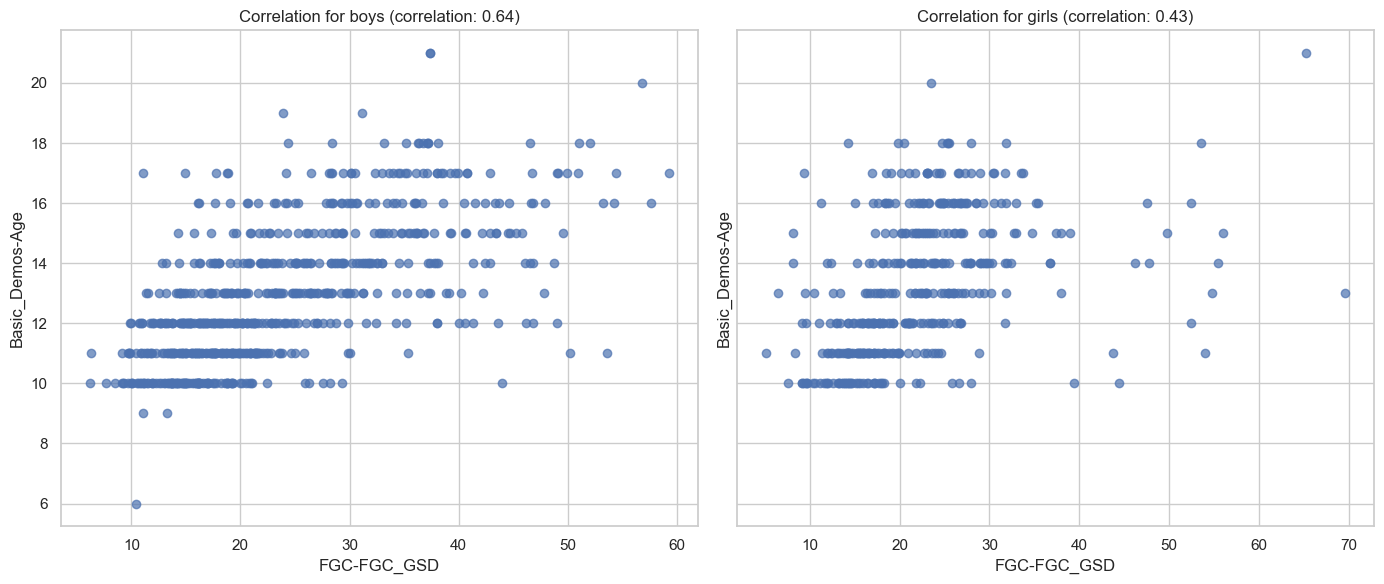

In [29]:
def plot_sex_correlation(df, x_col, y_col, group_col, group_values, group_labels, title_prefix, figsize=(14, 6)):
    # Create subplots for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=figsize, sharey=True)
    
    for i, (group_value, group_label) in enumerate(zip(group_values, group_labels)):
        # Filter the DataFrame based on the specified group value
        filtered_df = df[df[group_col] == group_value]
        
        # Calculate the correlation coefficient
        correlation = filtered_df[x_col].corr(filtered_df[y_col])
        
        # Create scatter plot
        axes[i].scatter(filtered_df[x_col], filtered_df[y_col], alpha=0.7)
        axes[i].set_xlabel(x_col)
        axes[i].set_ylabel(y_col)
        axes[i].set_title(f"{title_prefix} {group_label} (correlation: {correlation:.2f})")
        axes[i].grid(True)
    
    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

plot_sex_correlation(
    train,
    x_col='FGC-FGC_GSND',
    y_col='Basic_Demos-Age',
    group_col='Basic_Demos-Sex',
    group_values=[0, 1],
    group_labels=["boys", "girls"],
    title_prefix="Correlation for"
)

plot_sex_correlation(
    train,
    x_col='FGC-FGC_GSD',
    y_col='Basic_Demos-Age',
    group_col='Basic_Demos-Sex',
    group_values=[0, 1],
    group_labels=["boys", "girls"],
    title_prefix="Correlation for"
)

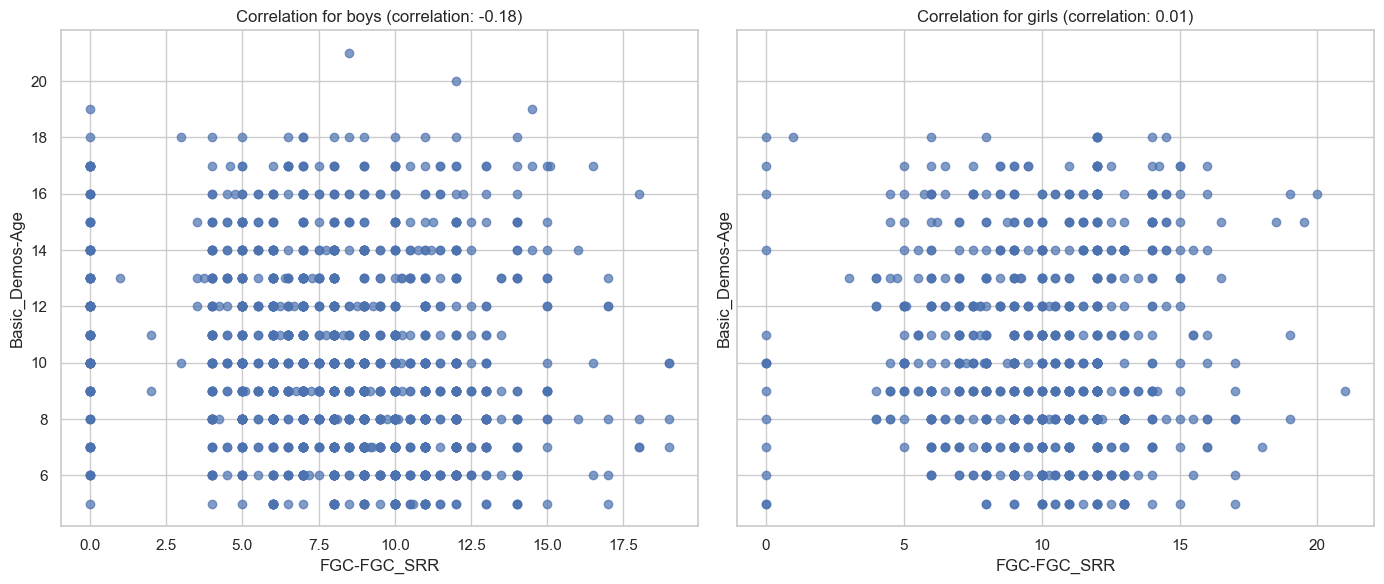

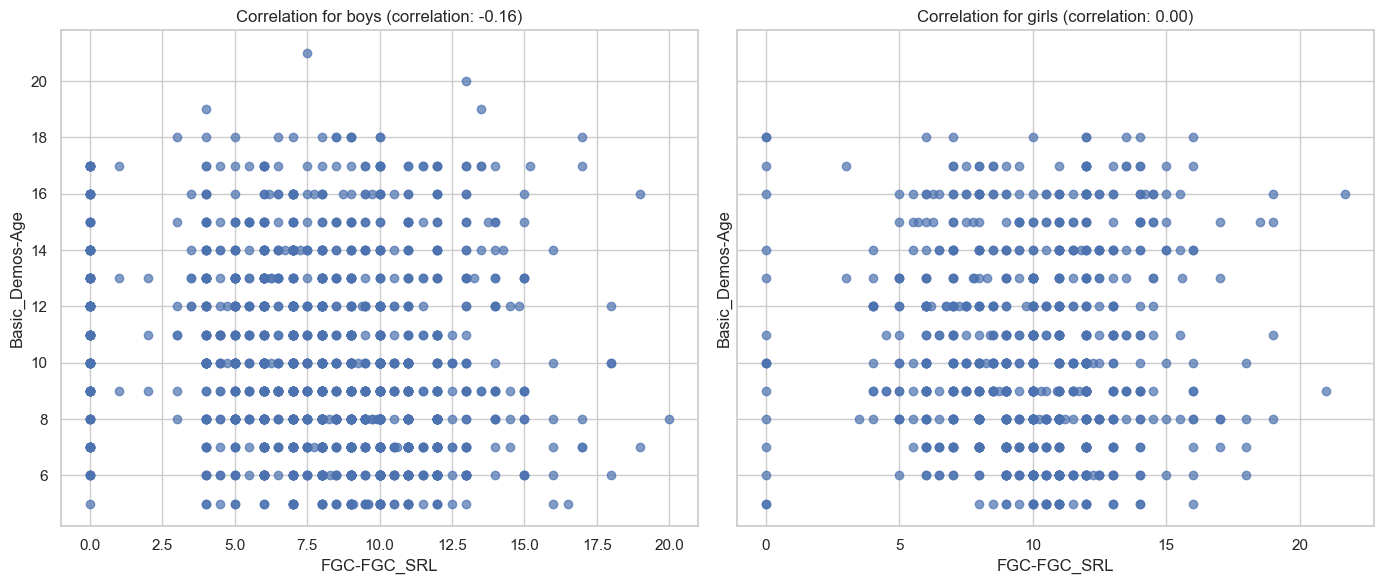

In [30]:
plot_sex_correlation(
    train,
    x_col='FGC-FGC_SRR',
    y_col='Basic_Demos-Age',
    group_col='Basic_Demos-Sex',
    group_values=[0, 1],
    group_labels=["boys", "girls"],
    title_prefix="Correlation for"
)

plot_sex_correlation(
    train,
    x_col='FGC-FGC_SRL',
    y_col='Basic_Demos-Age',
    group_col='Basic_Demos-Sex',
    group_values=[0, 1],
    group_labels=["boys", "girls"],
    title_prefix="Correlation for"
)

Because we don't know for sure how the measurements are taken then we can not say for sure what are outliers and what not. It can be possible that the measurements are taken from a certain threshold (for example from the toes in this case) then it is likely that there are a lot of boys and girls who have 0 values.

With the Bio-electric Impedance Analysis I would refer to Antonina Dolgorukova who did a great analysis of that data and concluded that their quality is too low and the info about them is not enough to count that data as useful.
You can find her work from here: https://www.kaggle.com/code/antoninadolgorukova/cmi-piu-features-eda#--Bio-electric-Impedance-Analysis

The PAQ values are not yet meaningful enough to say anything about them.

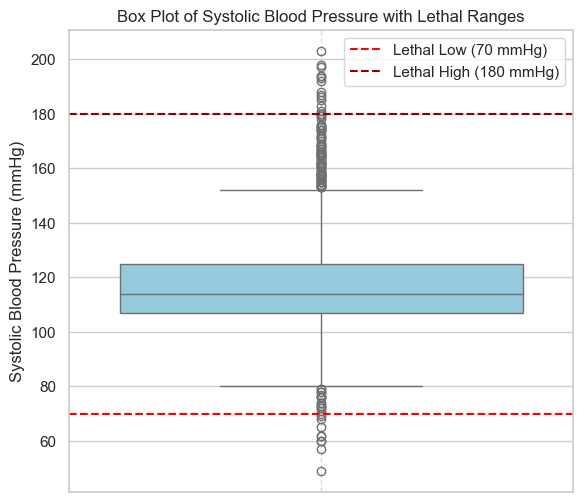

In [31]:
# Define lethal range thresholds
lethal_low = 70
lethal_high = 180

# Vertical box plot for 'Physical-Systolic_BP'
plt.figure(figsize=(6.5, 6))
sns.boxplot(data=train, y='Physical-Systolic_BP', color='skyblue')

# Add lethal range lines
plt.axhline(lethal_low, color='red', linestyle='--', label=f'Lethal Low ({lethal_low} mmHg)')
plt.axhline(lethal_high, color='darkred', linestyle='--', label=f'Lethal High ({lethal_high} mmHg)')

# Add labels, legend, and title
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.title('Box Plot of Systolic Blood Pressure with Lethal Ranges')
plt.legend(loc='upper right')

# Show the plot
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Vertical gridlines
plt.savefig('BP.png')
plt.show()

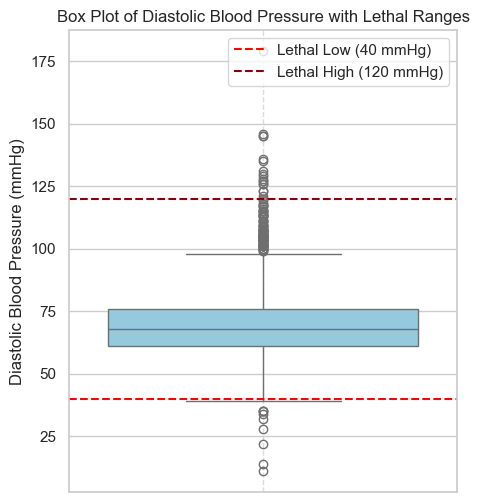

In [32]:
# Define lethal range thresholds
lethal_low = 40
lethal_high = 120

# Vertical box plot for 'Physical-Systolic_BP'
plt.figure(figsize=(5, 6))
sns.boxplot(data=train, y='Physical-Diastolic_BP', color='skyblue')

# Add lethal range lines
plt.axhline(lethal_low, color='red', linestyle='--', label=f'Lethal Low ({lethal_low} mmHg)')
plt.axhline(lethal_high, color='darkred', linestyle='--', label=f'Lethal High ({lethal_high} mmHg)')

# Add labels, legend, and title
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.title('Box Plot of Diastolic Blood Pressure with Lethal Ranges')
plt.legend(loc='upper right')

# Show the plot
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Vertical gridlines
plt.show()

## Recalculating SII

In [33]:
train_cols = set(train.columns)
test_cols = set(test.columns)
columns_not_in_test = sorted(list(train_cols - test_cols))
train_with_sii = train[train['sii'].notna()][columns_not_in_test]
train_with_sii[train_with_sii.isna().any(axis=1)].head().style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,PCIAT-Season,sii
24,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,nan,2.000000,30.000000,Summer,0.000000
93,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,Fall,0.000000
104,5.000000,2.000000,4.000000,2.000000,nan,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,45.000000,Fall,1.000000
141,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,nan,0.000000,2.000000,0.000000,26.000000,Winter,0.000000
142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,26.000000,Spring,0.000000


Some Parent-Child Internet Addiction Test (PCIAT) responses (PCIAT_01 to PCIAT_20) may be missing, but the SII score is still calculated based on the sum of available (non-NA) values. This approach can result in incorrect SII scores.

For example:
- In rows 1 and 3, one answer is missing. Since each question scores between 1 and 5, the total could be up to 5 points higher, potentially changing the SII category (e.g., from 0 to 1 or 1 to 2).
- In row 2, PCIAT-PCIAT_Total and SII appear incorrect as no test responses were provided.

We will verify if PCIAT-PCIAT_Total was calculated as the sum of available responses and then recalculate the SII score. This recalculation considers both the current PCIAT_Total and a hypothetical maximum (assuming missing answers scored 5), ensuring the SII thresholds are accurate even with missing values.

In [34]:
PCIAT_cols = [f'PCIAT-PCIAT_{i+1:02d}' for i in range(20)]
def recalculate_sii(row):
    if pd.isna(row['PCIAT-PCIAT_Total']):
        return np.nan
    max_possible = row['PCIAT-PCIAT_Total'] + row[PCIAT_cols].isna().sum() * 5
    if row['PCIAT-PCIAT_Total'] <= 30 and max_possible <= 30:
        return 0
    elif 31 <= row['PCIAT-PCIAT_Total'] <= 49 and max_possible <= 49:
        return 1
    elif 50 <= row['PCIAT-PCIAT_Total'] <= 79 and max_possible <= 79:
        return 2
    elif row['PCIAT-PCIAT_Total'] >= 80 and max_possible >= 80:
        return 3
    return np.nan

train['recalc_sii'] = train.apply(recalculate_sii, axis=1)

Verification of rows with different original and recalculated SII:

In [35]:
mismatch_rows = train[
    (train['recalc_sii'] != train['sii']) & train['sii'].notna()
]

mismatch_rows[PCIAT_cols + [
    'PCIAT-PCIAT_Total', 'sii', 'recalc_sii'
]].style.applymap(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,sii,recalc_sii
24,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,nan,2.000000,30.000000,0.000000,nan
93,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.000000,0.000000,nan
104,5.000000,2.000000,4.000000,2.000000,nan,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,45.000000,1.000000,nan
141,1.000000,2.000000,4.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,nan,0.000000,2.000000,0.000000,26.000000,0.000000,nan
142,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,nan,1.000000,26.000000,0.000000,nan
270,3.000000,3.000000,4.000000,2.000000,4.000000,2.000000,1.000000,3.000000,2.000000,2.000000,4.000000,0.000000,2.000000,1.000000,4.000000,nan,2.000000,3.000000,4.000000,2.000000,48.000000,1.000000,nan
368,2.000000,3.000000,4.000000,2.000000,5.000000,1.000000,2.000000,nan,nan,nan,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,nan,nan,31.000000,1.000000,nan
592,3.000000,0.000000,3.000000,0.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000,nan,nan,1.000000,2.000000,1.000000,1.000000,0.000000,21.000000,0.000000,nan
724,3.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,nan,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,1.000000,29.000000,0.000000,nan
877,5.000000,5.000000,5.000000,4.000000,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,4.000000,nan,4.000000,5.000000,5.000000,1.000000,5.000000,0.000000,5.000000,5.000000,78.000000,2.000000,nan


### Data Cleaning and SII Update

- Drop rows with missing recalculated SII (`recalc_sii`).
- Replace the `sii` column with values from `recalc_sii`.
- Add `complete_resp_total` to store `PCIAT-PCIAT_Total` for rows with all PCIAT responses complete; set to `NaN` otherwise.
- Drop the `recalc_sii` column and rows with missing `complete_resp_total` to ensure only complete data is retained.

In [36]:
train = train.dropna(subset =["recalc_sii"])
train['sii'] = train['recalc_sii']
train['complete_resp_total'] = train['PCIAT-PCIAT_Total'].where(
    train[PCIAT_cols].notna().all(axis=1), np.nan
)

train.drop(columns='recalc_sii', inplace=True)
train = train.dropna(subset =['complete_resp_total'])

In [37]:
train.shape

(2671, 82)

In [38]:
train['complete_resp_total'].isna().sum()

0

In [39]:
test.columns

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

Remove columns not available in the test set from the training set

In [40]:
# Identify extra columns in the training set
extra_columns = list(set(train.columns) - set(test.columns))
extra_columns.remove('sii')
extra_columns.remove('complete_resp_total')

train = train.drop(columns=extra_columns)

Store the cleaned data

In [41]:
train.to_csv('data/cleaned_train.csv', index=False)

## Best performing model

### Data Encoding and Preparation

1. **Identify and encode columns:** One-hot encode columns ending with `'-Season'` in train and test datasets.
2. **Combine datasets:** Add an `is_test` flag to distinguish test data, then concatenate train and test for uniform preprocessing.
3. **Split datasets:** Separate train and test datasets using the `is_test` flag and drop the flag afterward.
4. **Remove unused columns:** Drop the `id` column from the train dataset.
5. **Prepare features and target:** Define features (`X`) by excluding `sii` and `complete_resp_total` from train, and set `y` as `complete_resp_total`.


In [42]:
# Identify columns to encode (all that end with '-Season')
columns_to_encode = [col for col in train.columns if col.endswith('Season')]

# Perform one-hot encoding
train = pd.get_dummies(train, columns=columns_to_encode, prefix=columns_to_encode)
test = pd.get_dummies(test, columns=columns_to_encode, prefix=columns_to_encode)

test['is_test'] = True  # Add a flag to identify test data
train['is_test'] = False
combined_data = pd.concat([train, test], ignore_index=True)

# Split back into train and test datasets
train_data_preprocessed = combined_data[combined_data['is_test'] == False].drop(columns=['is_test'])
test_data_preprocessed = combined_data[combined_data['is_test'] == True].drop(columns=['is_test'])
train_data_preprocessed = train_data_preprocessed.drop(columns="id")

X = train_data_preprocessed.drop(columns=['sii', 'complete_resp_total'])
y = train_data_preprocessed['complete_resp_total']

In [43]:
!pip install xgboost

### XGBRegressor Initialization and Categorical Feature Handling

1. **Convert object columns to categorical:**
   - Convert all object-type columns in `X` to categorical data types for compatibility with `XGBRegressor`.

2. **Initialize `XGBRegressor`:**
   - Configure the model with the following parameters:
     - **`n_estimators=500`**: Number of boosting rounds.
     - **`learning_rate=0.01`**: Small step size for more gradual learning.
     - **`max_depth=8`**: Limits tree depth to avoid overfitting.
     - **`objective='reg:squarederror'`**: Optimizes using RMSE for regression tasks.
     - **`verbosity=1`**: Enables basic logging.
     - **`reg_lambda=3`**: Applies L2 regularization to reduce overfitting.
     - **`enable_categorical=True`**: Enables native support for categorical feature
     - **`random_state=42`**: Ensures reproducibilitys in XGBoost.


In [44]:
from xgboost import XGBRegressor

# Convert object columns to categorical or numeric
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')

# Initialize XGBRegressor with categorical support enabled
model = XGBRegressor(
    n_estimators=500,          # Number of boosting rounds
    learning_rate=0.01,         # Step size for weight updates
    max_depth=8,                # Maximum depth of trees
    objective='reg:squarederror', # Regression with RMSE as loss function
    verbosity=1,                # Logging level
    reg_lambda=3,               # L2 regularization term
    enable_categorical=True,     # Enable categorical feature support
    random_state=42
)

### Test Data Preparation, Model Training, and Prediction

1. **Remove unused columns:**
   - Drop the `sii` and `complete_resp_total` columns from `test_data_preprocessed` as they are not required for prediction.

2. **Convert object columns to categorical:**
   - Transform all object-type columns in `test_data_preprocessed` to `category` for compatibility with the trained model.

3. **Train the model:**
   - Fit the `XGBRegressor` model on the training data (`X` and `y`).

4. **Make predictions:**
   - Predict scores for the test dataset using the trained model. Exclude the `id` column during prediction.

5. **Prepare results:**
   - Create a `results_df` DataFrame containing:
     - `id`: The test data IDs.
     - `predicted_score`: The predicted scores from the model.

6. **Preview results:**
   - Display the first few rows of the results DataFrame for validation.


In [45]:
test_data_preprocessed = test_data_preprocessed.drop(columns=["sii", "complete_resp_total"])

# Convert object columns to categorical or numeric
for col in test_data_preprocessed.select_dtypes(include='object').columns:
    test_data_preprocessed[col] = test_data_preprocessed[col].astype('category')
# Fit the ensemble on the training data
model.fit(X, y)

# Predict on the test data
predicted_scores = model.predict(test_data_preprocessed.drop(columns=['id']))

results_df = pd.DataFrame({
    'id': test_data_preprocessed['id'],  
    'predicted_score': predicted_scores  
})

results_df.head()

,id,predicted_score
2671,00008ff9,50.894501
2672,000fd460,9.444437
2673,00105258,29.091908
2674,00115b9f,34.811562
2675,0016bb22,29.699633


### SII Calculation and Submission

1. **Define the SII calculation function:**
   - The `calculate_sii` function categorizes a `predicted_score` into one of four SII levels based on defined thresholds:
     - **0**: Score ≤ 30
     - **1**: Score between 31 and 49
     - **2**: Score between 50 and 79
     - **3**: Score ≥ 80
   - Handles missing values by returning `NaN`.

2. **Apply the function:**
   - Calculate the SII values by applying `calculate_sii` to the `predicted_score` column in `results_df`.

3. **Clean up the DataFrame:**
   - Drop the `predicted_score` column, leaving only the `id` and calculated `sii` columns.

4. **Save results:**
   - Export the resulting DataFrame to a CSV file (`submission_test.csv`) for submission or further analysis.

5. **Display results:**
   - Print the final DataFrame for review.


In [46]:
# Define the function to calculate SII index
def calculate_sii(predicted_score):
    if pd.isna(predicted_score):  # Handle missing values
        return np.nan
    rounded_score = round(predicted_score)  # Round the predicted score to an integer
    if rounded_score <= 30:
        return 0
    elif 31 <= rounded_score <= 49:
        return 1
    elif 50 <= rounded_score <= 79:
        return 2
    elif rounded_score >= 80:
        return 3
    return np.nan  # Default fallback, though this shouldn't happen
# Apply the function to the predicted_score column
results_df['sii'] = results_df['predicted_score'].apply(calculate_sii)
results_df = results_df.drop(columns='predicted_score')
# Save or display the results
results_df.to_csv('submission_test.csv', index=False)
print(results_df)

            id  sii
2671  00008ff9    2
2672  000fd460    0
2673  00105258    0
2674  00115b9f    1
2675  0016bb22    0
2676  001f3379    0
2677  0038ba98    0
2678  0068a485    0
2679  0069fbed    1
2680  0083e397    0
2681  0087dd65    1
2682  00abe655    0
2683  00ae59c9    1
2684  00af6387    1
2685  00bd4359    1
2686  00c0cd71    2
2687  00d56d4b    0
2688  00d9913d    0
2689  00e6167c    0
2690  00ebc35d    1


## Models comparison

Below are the models we tried and their respective scores calculated by Kaggle.

In [47]:
# Define the model results dictionary
model_results = {
    "Model": ["Catboost", "Catboost with GridSearch", "Random Forest", 
              "Ensemble of CatBoost and RF", "XGBoost", "Competition Best"],
    "QWK": [0.371, 0.368, 0.36, 0.365, 0.375, 0.5]
}

# Convert to DataFrame
model_results_df = pd.DataFrame(model_results)
model_results_df = model_results_df.sort_values(by="QWK", ascending=False)

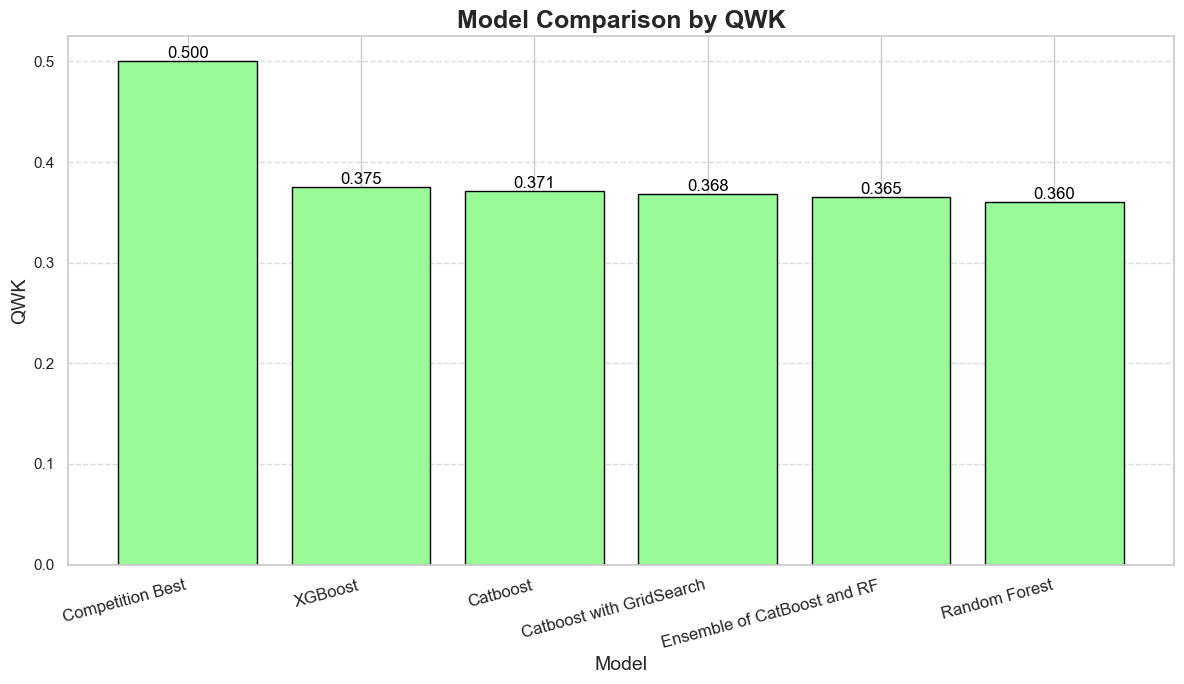

In [48]:
# Plot the results
plt.figure(figsize=(12, 7))
bars = plt.bar(model_results_df['Model'], model_results_df['QWK'], color='palegreen', edgecolor='black')

# Add values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', 
             ha='center', va='bottom', fontsize=12, color='black')

# Add title and labels
plt.title('Model Comparison by QWK', fontsize=18, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('QWK', fontsize=14)

# Customize x-axis ticks
plt.xticks(rotation=15, ha='right', fontsize=12)

# Add grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.savefig('QWK.png')
# Show plot
plt.show()